In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import os
import plotly.graph_objs as go


In [20]:
df = pd.read_csv(r"C:\Users\Joe\Downloads\netflix_titles.csv")

In [21]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) *100
    if null_rate > 0:
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.9%
cast null rate: 9.37%
country null rate: 9.43%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%
Unnamed: 12 null rate: 100.0%
Unnamed: 13 null rate: 100.0%
Unnamed: 14 null rate: 100.0%
Unnamed: 15 null rate: 100.0%
Unnamed: 16 null rate: 100.0%
Unnamed: 17 null rate: 100.0%
Unnamed: 18 null rate: 100.0%
Unnamed: 19 null rate: 100.0%
Unnamed: 20 null rate: 100.0%
Unnamed: 21 null rate: 100.0%
Unnamed: 22 null rate: 100.0%
Unnamed: 23 null rate: 100.0%
Unnamed: 24 null rate: 100.0%
Unnamed: 25 null rate: 100.0%


In [46]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['cast'].replace(np.nan, 'No Data', inplace = True)
df['director'].replace(np.nan, 'No Data', inplace = True)

df.drop_duplicates(inplace=True)

In [47]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [48]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      8809 non-null   object
 4   cast          8809 non-null   object
 5   country       8809 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.7+ KB


In [50]:
df.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [51]:
df['date_added'] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [52]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,November,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,January,2020.0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3.0,March,2019.0
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,2024-04-05,2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...,4.0,April,2024.0


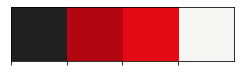

In [55]:
sns.palplot(['#221f1f','#b20710','#e50914','#f5f5f1'])


<AxesSubplot:ylabel='type'>

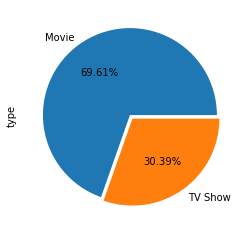

In [62]:
df['type'].value_counts().plot.pie(autopct = '%1.2f%%', explode = [0,0.05])

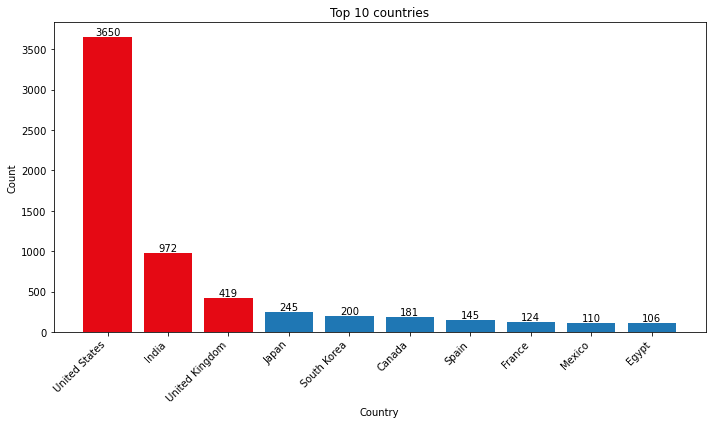

In [66]:
country_counts = df['country'].value_counts().head(10)  #top 10 countries

plt.figure(figsize = (10,6))
bars = plt.bar(country_counts.index, country_counts.values)

for bar, count in zip(bars, country_counts.values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, count, ha = 'center', va = 'bottom')
    
plt.bar(country_counts. index[:3], country_counts.values[:3], color = '#e50914')   
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 countries')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

plt.show()

In [ ]:
#The USA, India and United Kingdom are the prolific producers of netflix content.

In [69]:
# count movies and tv shows per country
movie_counts_country = df[df['type'] == 'Movie']['country'].value_counts()
tv_show_counts_country = df[df['type'] == 'TV Show']['country'].value_counts()

#combine the counts into a single dataframe
df_counts = pd.DataFrame({'Movie': movie_counts_country, 'TV Show': tv_show_counts_country})
df_counts['total_by_country'] = df_counts.sum(axis = 1)

#sort by total count in descending order and select the top 10
top_10_counts = df_counts.sort_values(by = 'total_by_country', ascending = False).head(10)

print(top_10_counts)

                 Movie  TV Show  total_by_country
United States   2499.0   1151.0            3650.0
India            893.0     79.0             972.0
United Kingdom   206.0    213.0             419.0
Japan             76.0    169.0             245.0
South Korea       41.0    159.0             200.0
Canada           122.0     59.0             181.0
Spain             97.0     48.0             145.0
France            75.0     49.0             124.0
Mexico            70.0     40.0             110.0
Egypt             92.0     14.0             106.0


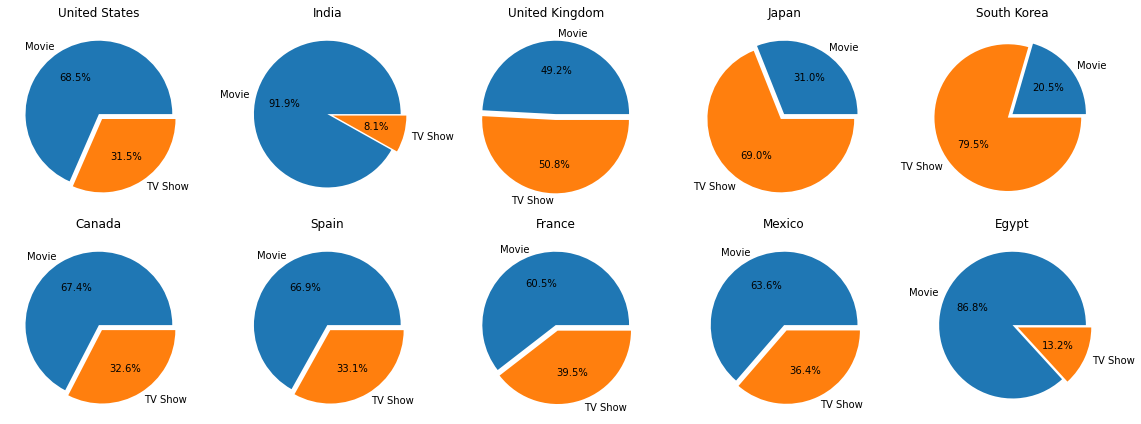

In [80]:
rows, cols = 2, 5
fig, axes = plt.subplots(rows, cols, figsize = (16,6))

counter = 0 #counter to keep track of subplot position

#loop through each row in the dataframe
for country, row in top_10_counts.iterrows():
    movie_count = row['Movie']
    tv_show_count = row['TV Show']
    total_count = row['total_by_country']
    
    labels =['Movie', 'TV Show']
    sizes = [movie_count, tv_show_count]

    ax = axes[counter // cols, counter % cols] #select the current subplot based on counter

    #create a piechart on the selected subplot
    ax.pie(sizes, labels = labels, autopct = '%1.1f%%', explode =[0,0.08])
    ax.set_title(country)

    counter += 1 # increase counter for the next subplot position

plt.tight_layout()
plt.show()


In [ ]:
#Netflix in India is nearly made up entirely of movies
#South Korea is almost entirely TV shpws

In [82]:
df = df[df['rating'] != 'A']
movie_counts_rating = df[df['type'] == 'Movie']['rating'].value_counts()
tv_show_counts_rating = df[df['type'] == 'TV Show']['rating'].value_counts()

#combine the counts into a single dataframe
df_counts = pd.DataFrame({'Movie': movie_counts_rating, 'TV Show': tv_show_counts_rating})
df_counts['total_by_type'] = df_counts.sum(axis = 1)

rating_agg = df_counts.sort_values(by = 'total_by_type', ascending = False)

print(rating_agg)

          Movie  TV Show  total_by_type
TV-MA      2062   1146.0         3208.0
TV-14      1427    733.0         2160.0
TV-PG       540    323.0          863.0
R           797      2.0          799.0
PG-13       490      NaN          490.0
TV-Y7       139    195.0          334.0
TV-Y        131    176.0          307.0
PG          287      NaN          287.0
TV-G        126     94.0          220.0
NR           75      5.0           80.0
G            41      NaN           41.0
TV-Y7-FV      5      1.0            6.0
UR            3      NaN            3.0
NC-17         3      NaN            3.0
74 min        1      NaN            1.0
84 min        1      NaN            1.0
66 min        1      NaN            1.0


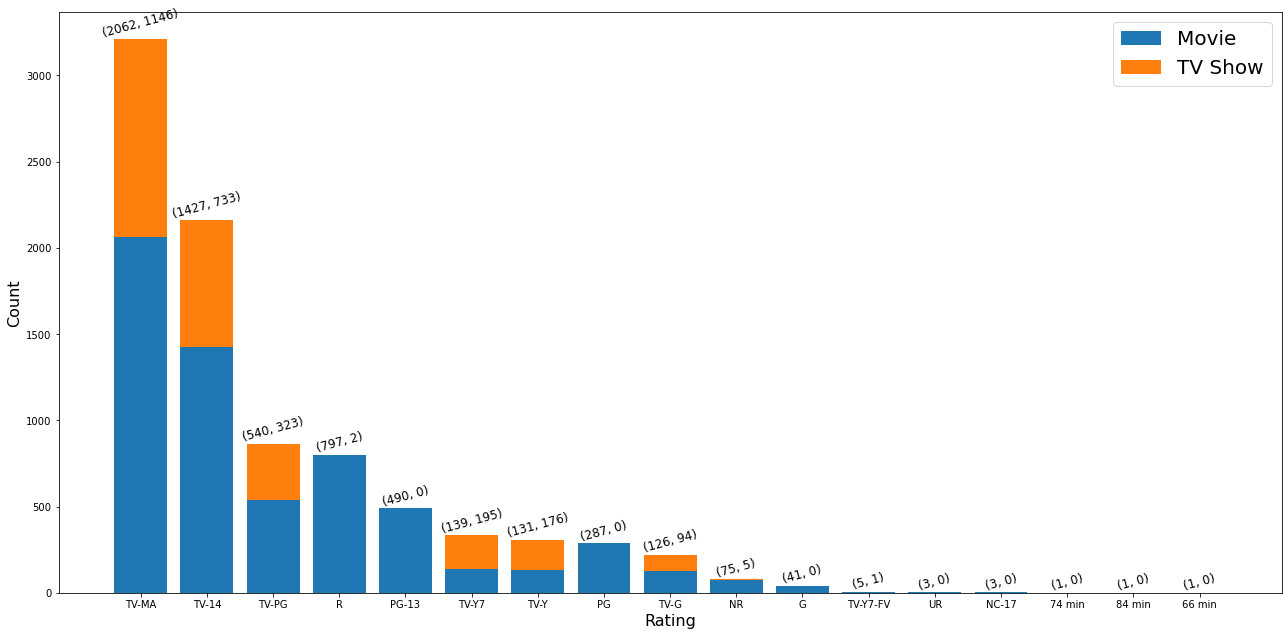

In [85]:
movie_counts_rating = df[df['type'] == 'Movie']['rating'].value_counts()
tv_show_counts_rating = df[df['type'] == 'TV Show']['rating'].value_counts()

#combine the counts into a single dataframe
df_counts = pd.DataFrame({'Movie': movie_counts_rating, 'TV Show': tv_show_counts_rating})
df_counts.fillna(0, inplace = True)
df_counts['total_by_type'] = df_counts.sum(axis = 1)

rating_agg = df_counts.sort_values(by = 'total_by_type', ascending = False)

#Creating a dual stacked bar chart
fig,ax = plt.subplots(figsize =(18,9))
ax.bar(rating_agg.index, rating_agg['Movie'], label = 'Movie')
ax.bar(rating_agg.index, rating_agg['TV Show'], bottom = rating_agg['Movie'], label = 'TV Show')

#Add total labels on top of each stack
for idx, row in rating_agg.iterrows():
    total_label = f"({int(row['Movie'])}, {int(row['TV Show'])})"
    y_pos = row['Movie'] + row['TV Show']
    ax.text(idx, y_pos, total_label, ha = 'center', va = 'bottom', fontsize = 12, rotation = 15)# label position and size
    
ax.set_xlabel('Rating', fontsize = 16)
ax.set_ylabel('Count', fontsize = 16)
ax.legend(loc = 'upper right', prop = {'size':20})
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [ ]:
#Most common rating distribution for both movies and TV shows are TV-MA and TV-14

In [90]:

movie_counts_year = df[df['type'] == 'Movie']['year_added'].value_counts()
tv_show_counts_year = df[df['type'] == 'TV Show']['year_added'].value_counts()

# Combine the counts into a single DataFrame
df_counts = pd.DataFrame({'Movie': movie_counts_year, 'TV Show': tv_show_counts_year})
df_counts['total_by_year'] = df_counts.sum(axis=1)

# Sort the DataFrame by year_added in descending order
rating_agg = df_counts.sort_index(ascending=False)

print(rating_agg)


         Movie  TV Show  total_by_year
2024.0     NaN      1.0            1.0
2021.0   993.0    505.0         1498.0
2020.0  1284.0    595.0         1879.0
2019.0  1424.0    592.0         2016.0
2018.0  1237.0    412.0         1649.0
2017.0   839.0    349.0         1188.0
2016.0   253.0    176.0          429.0
2015.0    56.0     26.0           82.0
2014.0    19.0      5.0           24.0
2013.0     6.0      5.0           11.0
2012.0     3.0      NaN            3.0
2011.0    13.0      NaN           13.0
2010.0     1.0      NaN            1.0
2009.0     2.0      NaN            2.0
2008.0     1.0      1.0            2.0


In [91]:
df = df[df['year_added'] != 2024]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          8807 non-null   object        
 4   cast              8807 non-null   object        
 5   country           8807 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  month_added       8797 non-null   float64       
 13  month_name_added  8797 non-null   object        
 14  year_added        8797 n

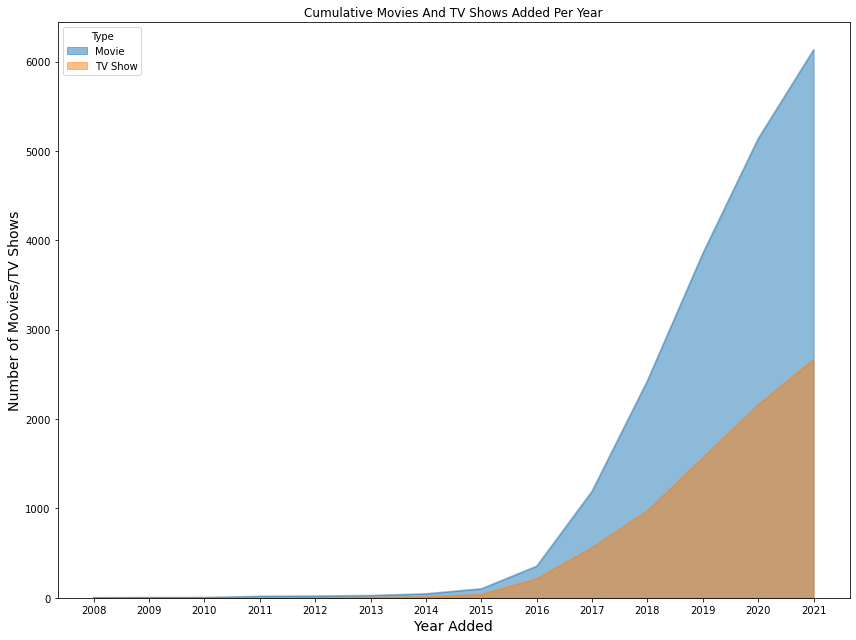

In [97]:
df_grouped = df.groupby(['year_added', 'type']).size().unstack(fill_value=0).cumsum()# is used to pivot the data to make it suitable for plotting.
#size() is used instead of count() to get the counts.
#cumsum() calculates the cumulative sum for each year.

fig, ax = plt.subplots(figsize=(12, 9))
df_grouped.plot(kind='area', stacked=False, ax=ax, alpha=0.5)
ax.set_title('Cumulative Movies And TV Shows Added Per Year')
ax.set_xlabel('Year Added', fontsize=14)
ax.set_ylabel('Number of Movies/TV Shows', fontsize=14)
ax.legend(title='Type')

plt.xticks(df_grouped.index)
plt.tight_layout()
plt.show()

In [ ]:
#Theres more movies than TV shows

In [127]:
import calendar

movie_counts_month = df[df['type'] == 'Movie']['month_name_added'].value_counts()
tv_show_counts_month = df[df['type'] == 'TV Show']['month_name_added'].value_counts()

# Combine the counts into a single DataFrame
df_counts = pd.DataFrame({'Movie': movie_counts_month, 'TV Show': tv_show_counts_month})
df_counts['total_by_month'] = df_counts.sum(axis=1)

# Sort the DataFrame by total_by_month in descending order
month_agg = df_counts.sort_values(by='total_by_month', ascending=False)

print(month_agg)

           Movie  TV Show  total_by_month
July         565      262             827
December     547      266             813
September    519      251             770
April        550      214             764
October      545      215             760
August       519      236             755
March        529      213             742
January      546      192             738
June         492      236             728
November     498      207             705
May          439      193             632
February     382      181             563


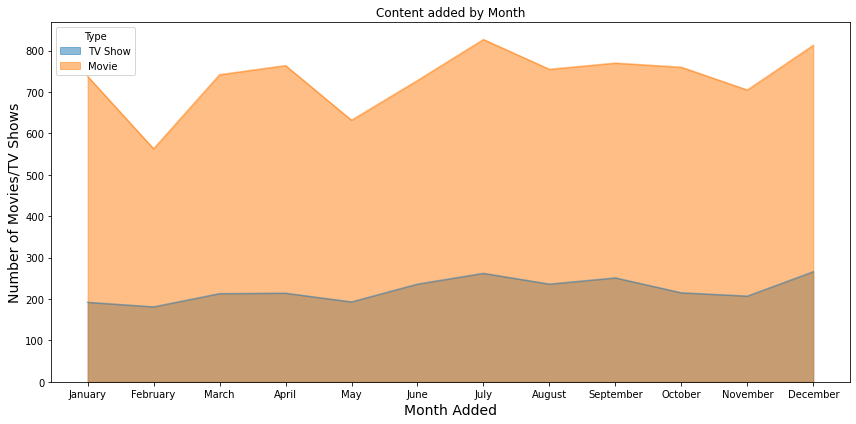

In [121]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month_added' to categorical with custom order
df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

# Group by month_added and type, count occurrences, and unstack to reshape
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

# Plotting
fig, ax = plt.subplots(1,1, figsize=(12, 6))
data_sub.plot(kind='area', stacked=False, ax=ax)
ax.set_title('Content added by Month')
ax.set_xlabel('Month Added', fontsize=14)
ax.set_ylabel('Number of Movies/TV Shows', fontsize=14)
ax.legend(title='Type')

# Set x-axis ticks to month names
plt.xticks(range(len(month_order)), month_order)

plt.tight_layout()
plt.show()

In [ ]:
#December and January are the best mmonths for new content. february is the worst.

In [136]:
ratings_ages = {
    'TV-PG':'Older Kids',
    'TV-MA':'Adults',
    'TV-Y7-FV':'Older Kids',
    'TV-Y7':'Older Kids',
    'TV-14':'Teens',
    'R':'Adults',
    'TV-Y':'Kids',
    'NR':'Adults',
    'PG-13':'Teens',
    'TV-G':'Kids',
    'PG':'Older Kids',
    'G':'Kids',
    'UR':'Adults',
    'NC-17':'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
unique_target_ages = df['target_ages'].unique()

# Filter out unexpected values in 'target_ages' column
expected_age_groups = ['Teens', 'Adults', 'Older Kids', 'Kids']
filtered_df = df[df['target_ages'].isin(expected_age_groups)]

# Get unique target age groups after filtering
unique_target_ages = filtered_df['target_ages'].unique()


print(unique_target_ages)

['Teens' 'Adults' 'Older Kids' 'Kids']


In [143]:
# Count movies and TV shows per country by target_age
df_grouped = filtered_df.groupby(['country', 'target_ages'])['type'].count().unstack(fill_value=0)

# Combine counts into a single DataFrame with total
df_grouped['Total'] = df_grouped.sum(axis=1)

# Sort by total count in descending order
df_grouped = df_grouped.sort_values(by='Total', ascending=False)

# Show Target ages proportion of total content by top 10 countries
top_10_countries = df_grouped.head(10)
prop_of_total = top_10_countries.div(top_10_countries['Total'], axis=0) * 100

# Round percentages to 2 decimal places
prop_of_total = prop_of_total.round(2)


print(prop_of_total)


target_ages     Adults   Kids  Older Kids  Teens  Total
country                                                
United States    46.42   8.45       19.53  25.60  100.0
India            26.03   1.44       15.53  57.00  100.0
United Kingdom   51.31  10.02       19.57  19.09  100.0
Japan            35.66   1.23       24.59  38.52  100.0
South Korea      44.22   2.51       11.56  41.71  100.0
Canada           44.20  17.68       22.10  16.02  100.0
Spain            84.14   2.07        4.14   9.66  100.0
France           66.94   9.68        5.65  17.74  100.0
Mexico           77.27   1.82        8.18  12.73  100.0
Egypt            27.36   0.94        3.77  67.92  100.0


<Figure size 1296x648 with 0 Axes>

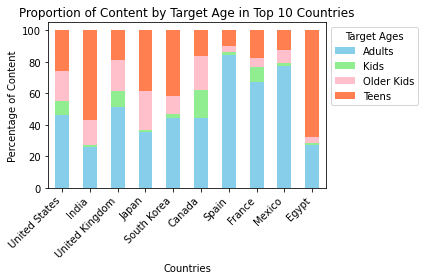

In [149]:
target_ages = prop_of_total.columns[:-1]
countries = prop_of_total.index

# Create a stacked bar chart
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed
prop_of_total[target_ages].plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'pink', 'coral'])
plt.xlabel('Countries')
plt.ylabel('Percentage of Content')
plt.title('Proportion of Content by Target Age in Top 10 Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Target Ages', labels=target_ages, loc='upper left', bbox_to_anchor=(1, 1))  # Add legend

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
#Content in spain and mexico lean towards the adult audiences
#Canada creates more content for kids
#Egypt and india creates most content for teens

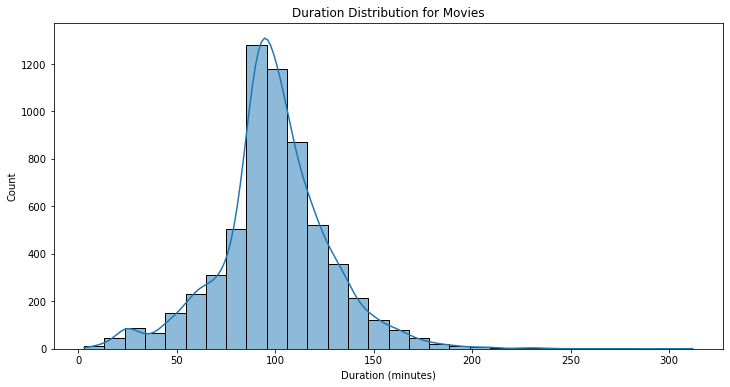

In [172]:
# Filter movies from the DataFrame
movies = df[df['type'] == 'Movie'].copy()

# Remove ' min' suffix and convert 'duration' to integers, handling non-finite values
movies['duration'] = movies['duration'].str.replace(' min', '')
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

# Filter out non-finite values (NaN) and convert to integers
movies = movies.dropna(subset=['duration'])
movies['duration'] = movies['duration'].astype(int)

# Plot the duration distribution
plt.figure(figsize=(12, 6))
sns.histplot(movies['duration'], bins=30, kde=True)
plt.title('Duration Distribution for Movies')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

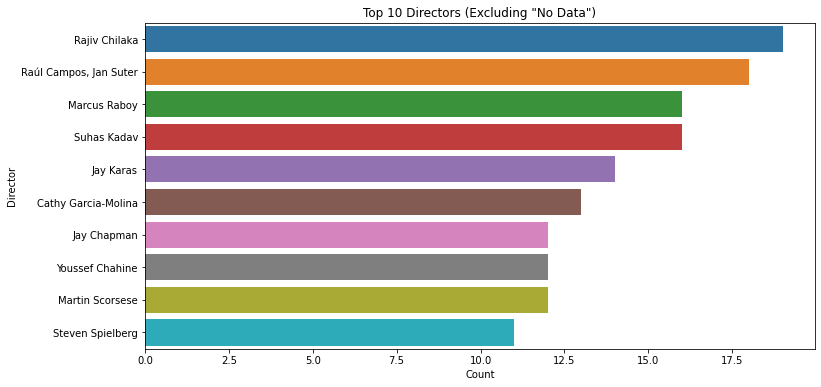

In [173]:
# Top Directors
# Filter out "no data" entries from the 'director' column
valid_directors = df[df['director'] != 'No Data']

# Get the top 10 directors by count of movies or TV shows, excluding "no data" entries
top_directors = valid_directors['director'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors (Excluding "No Data")')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

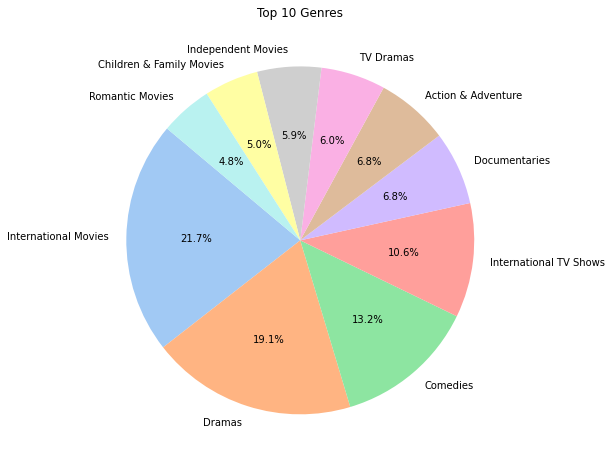

In [166]:
# Genre Distribution (using Pie Chart)
df['listed_in'] = df['listed_in'].str.split(', ')
genres_series = df.explode('listed_in')['listed_in']
top_genres = genres_series.value_counts().head(10)
plt.figure(figsize=(10, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 10 Genres')
plt.show()

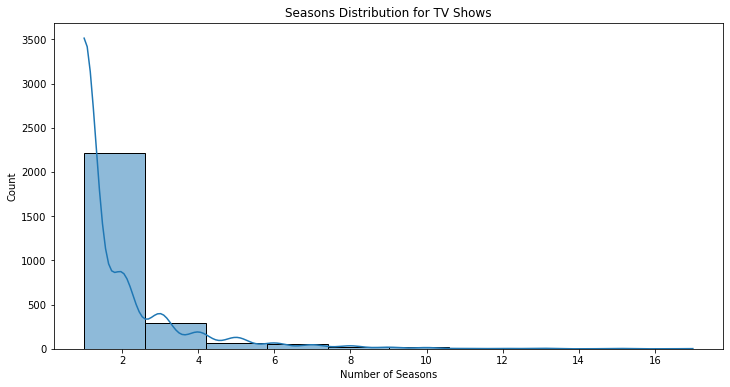

In [167]:
# Seasons vs. Episodes (for TV Shows)
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)
plt.figure(figsize=(12, 6))
sns.histplot(tv_shows['seasons'], bins=10, kde=True)
plt.title('Seasons Distribution for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()